Description: This script plots total and CG flash rates for the Edmond-Carney storm (Fig 3 (a) and (b)). NLDN data used with a threshold of 15 kA to avoid misclassified IC flashes.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import num2date, date2num, Dataset
import pyart
import glob
import os
import pandas as pd
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime

# set run command parameters for matplotlib plots
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)


plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["font.size"] = 15
plt.rcParams["xtick.labelsize"] = 23
plt.rcParams["ytick.labelsize"] = 23
plt.rcParams["axes.labelsize"] = 18
plt.rcParams["legend.fontsize"] = 18
plt.rcParams["legend.markerscale"] = 2


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [67]:
# Due to proprietary issues we cannot share raw NLDN data files. Interested readers may contact Vaisala for direct access.

# load processed 1 minute binned data for total CG, positive CG, and negative CG NLDN flash rates 
total1 = pd.read_csv('../data/processed/nldn_data/nldn_1min_cg_flash_rates.csv',index_col=0)
total1.index = pd.to_datetime(total1.index)

pos1 = pd.read_csv('../data/processed/nldn_data/nldn_1min_pos_cg_flash_rates.csv',index_col=0)
pos1.index = pd.to_datetime(pos1.index)

neg1 = pd.read_csv('../data/processed/nldn_data/nldn_1min_neg_cg_flash_rates.csv',index_col=0)
neg1.index = pd.to_datetime(neg1.index)

### We also want to plot the histogram for total lightning flash rates. After processing OKLMA dataset for the same duration (2000 - 2230 UTC) using lmatools python package, we saved results of flash rates calculation in the 'flash_stats.csv' file.

In [68]:
# Load data from lasso analysis generated flash stats csv file using lmatools
lasso = '../data/interim/flash_stats.csv'

lasso_data = pd.read_csv(lasso, usecols=[0, 2])
lasso_data = lasso_data[0:-1]
lasso_data.columns = ['time', 'number']

lasso_data.index = pd.to_datetime(lasso_data['time'])
lasso_data = lasso_data.drop(columns=['time'])

In [69]:
zdr_vol_ts = pd.read_csv('../data/processed/segmented_stacks/zdr/zdr_vol_gt_1dB_pyart_based_segmentation')
zdr_vol_ts = zdr_vol_ts.set_index('time')

In [70]:
zdr_vol_ts.index = pd.to_datetime(zdr_vol_ts.index)

In [71]:
zdr_vol_ts.head()

,vol
time,
2013-05-19 20:02:36,90.625
2013-05-19 20:06:52,99.375
2013-05-19 20:11:07,195.875
2013-05-19 20:15:23,160.625
2013-05-19 20:19:38,223.750


### Final step is to plot the histograms of CG and total lightning flash rates using matplotlib

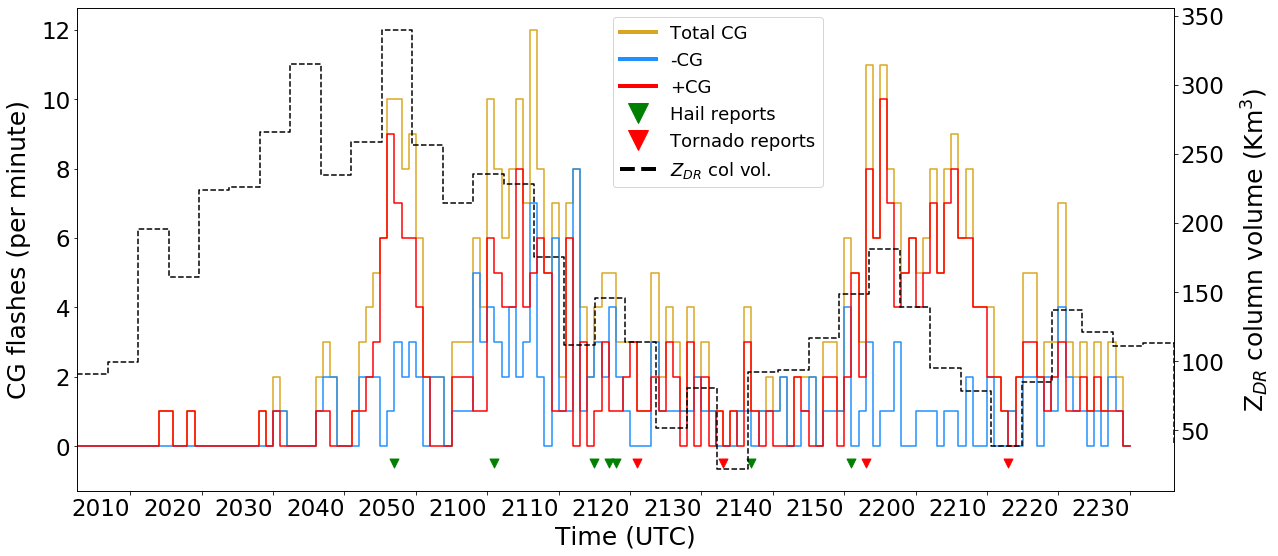

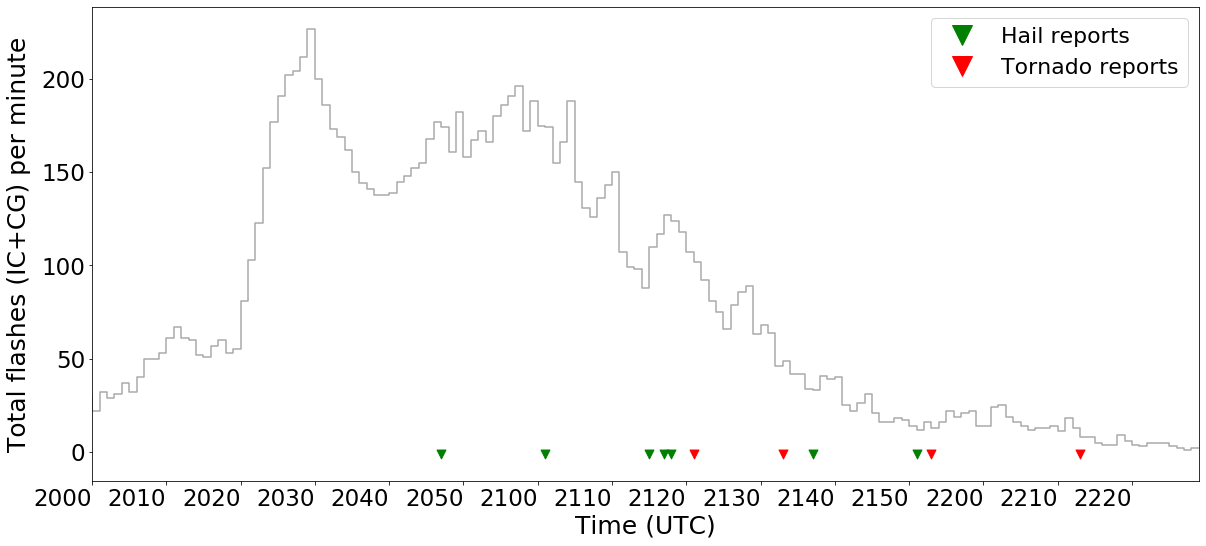

In [72]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)  # axis 1 for CG flash rates

# ax1.set_facecolor('gainsboro')

with pd.plotting.plot_params.use('x_compat', True):
    total1.plot(drawstyle='steps', color='goldenrod',
                 ax=ax1, rot=0)
    neg1.plot(drawstyle='steps', color='dodgerblue',
              ax=ax1, rot=0)
    pos1.plot(drawstyle='steps', color='red', ax=ax1, rot=0)

# adjust and set the location of ticks and ticklabels
ax1.xaxis.set_major_locator(
    mdates.MinuteLocator(byminute=[0, 10, 20, 30, 40, 50]))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H%M'))
ax1.set_xlabel('Time (UTC)', fontsize=25)
ax1.set_ylabel('CG flashes (per minute)',
               rotation=90, labelpad=10, fontsize=25)

# add hail reports on x-axis (these reports were obtained from SPC storm reports archive)
ax1.scatter(datetime(2013, 5, 19, 20, 47, 0), -0.5,
            marker='v', s=80, c='g', label='Hail reports')
ax1.scatter(datetime(2013, 5, 19, 21, 1, 0), -0.5, marker='v', s=80, c='g')
ax1.scatter(datetime(2013, 5, 19, 21, 15, 0), -0.5, marker='v', s=80, c='g')
ax1.scatter(datetime(2013, 5, 19, 21, 17, 0), -0.5, marker='v', s=80, c='g')
ax1.scatter(datetime(2013, 5, 19, 21, 18, 0), -0.5, marker='v', s=80, c='g')
ax1.scatter(datetime(2013, 5, 19, 21, 37, 0), -0.5, marker='v', s=80, c='g')
ax1.scatter(datetime(2013, 5, 19, 21, 51, 0), -0.5, marker='v', s=80, c='g')

# add tornado reports on x-axis (these reports were obtained from SPC storm reports archive)
ax1.scatter(datetime(2013, 5, 19, 21, 21, 0), -0.5, marker='v', s=80, c='r')
ax1.scatter(datetime(2013, 5, 19, 21, 33, 0), -0.5, marker='v', s=80, c='r')
ax1.scatter(datetime(2013, 5, 19, 21, 53, 0), -0.5, marker='v', s=80, c='r')
ax1.scatter(datetime(2013, 5, 19, 22, 13, 0), -0.5, marker='v', s=80, c='r')

axt = ax1.twinx()
# with pd.plotting.plot_params.use("x_compat", True):
plot2 = zdr_vol_ts.sum(level="time").plot(
    drawstyle="steps-post", color="k", ax=axt, rot=0,
    linestyle = '--',legend=False,
)  # step line plot for zdr volume in subplot 1

axt.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0, 10, 20, 30, 40, 50]))
axt.xaxis.set_major_formatter(mdates.DateFormatter("%H%M"))
axt.set_ylabel("Z$_{DR}$ column volume (Km$^{3}$)", labelpad=15, fontsize=25)

legend_elements = [Line2D([0], [0], color='goldenrod', lw=4, label='total CG'),
                   Line2D([0], [0], color='dodgerblue', lw=4, label='-CG'),
                   Line2D([0], [0], color='red', lw=4, label='+CG'),
                   Line2D([0], [0], color='green', marker='v', linestyle='None',
                          markersize=10, label='Hail reports'),
                   Line2D([0], [0], color='red', marker='v', linestyle='None',
                          markersize=10, label='Tornado reports'),
                   Line2D([0], [0], color='k', lw=4, linestyle='--',label='$Z_{DR}$ col vol}')
                  ]

ax1.legend((legend_elements[0], legend_elements[1],
            legend_elements[2], legend_elements[3], legend_elements[4], legend_elements[5]),
           ('Total CG', '-CG', '+CG', 'Hail reports', 'Tornado reports','$Z_{DR}$ col vol.'),
           bbox_to_anchor=(0.48, 0.5, 0.5, 0.5), prop={'size': 18})

plt.tight_layout()
plt.show()


# Figure to plot total flashes obtained from lasso analysis in a separate figure

fig = plt.figure(figsize=(17,8))
ax2 = fig.add_subplot(111)
with pd.plotting.plot_params.use('x_compat', True):
    lasso_data.plot(drawstyle='steps', color='darkgray', ax=ax2)

ax2.xaxis.set_major_locator(
    mdates.MinuteLocator(byminute=[0, 10, 20, 30, 40, 50]))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H%M'))
plt.xticks(rotation=0)

# add hail reports on x-axis (these reports were obtained from SPC storm reports archive)
ax2.scatter(datetime(2013, 5, 19, 20, 47, 0), -1, marker='v', s=80, c='g')
ax2.scatter(datetime(2013, 5, 19, 21, 1, 0), -1, marker='v', s=80, c='g')
ax2.scatter(datetime(2013, 5, 19, 21, 15, 0), -1, marker='v', s=80, c='g')
ax2.scatter(datetime(2013, 5, 19, 21, 17, 0), -1, marker='v', s=80, c='g')
ax2.scatter(datetime(2013, 5, 19, 21, 18, 0), -1, marker='v', s=80, c='g')
ax2.scatter(datetime(2013, 5, 19, 21, 37, 0), -1, marker='v', s=80, c='g')
ax2.scatter(datetime(2013, 5, 19, 21, 51, 0), -1, marker='v', s=80, c='g')

# add tornado reports on x-axis (these reports were obtained from SPC storm reports archive)
ax2.scatter(datetime(2013, 5, 19, 21, 21, 0), -1, marker='v', s=80, c='r')
ax2.scatter(datetime(2013, 5, 19, 21, 33, 0), -1, marker='v', s=80, c='r')
ax2.scatter(datetime(2013, 5, 19, 21, 53, 0), -1, marker='v', s=80, c='r')
ax2.scatter(datetime(2013, 5, 19, 22, 13, 0), -1, marker='v', s=80, c='r')

ax2.legend((legend_elements[3], legend_elements[4]),
           ('Hail reports', 'Tornado reports'),
           loc='best', prop={'size': 22})

ax2.set_xlabel('Time (UTC)', fontsize=25)
ax2.set_ylabel('Total flashes (IC+CG) per minute', labelpad=10, fontsize=25)


plt.tight_layout()
plt.show()